In [ ]:
import json
import base64
from IPython.display import Image, display, Markdown
from langchain_core.messages import HumanMessage, SystemMessage, AIMessage
from together import Together

In [12]:
import getpass
import os

if not os.environ.get("TOGETHER_API_KEY"):
  os.environ["TOGETHER_API_KEY"] = getpass.getpass("Enter API key for Together AI: ")

In [13]:
def encode_image(image_path):
        with open(image_path, "rb") as image_file:
            return base64.b64encode(image_file.read()).decode('utf-8')

In [14]:
labels = [
    "First Name",
    'Last Name',
    "Sex",
    "Passport Number",
    "Permanent Account Number",
    "Nationality",
    "Date of Birth",
    "Place of Birth",
    "Date of Issue",
    "Date of Expiration",
]

details = ", ".join(labels)
details

'First Name, Last Name, Sex, Passport Number, Permanent Account Number, Nationality, Date of Birth, Place of Birth, Date of Issue, Date of Expiration'

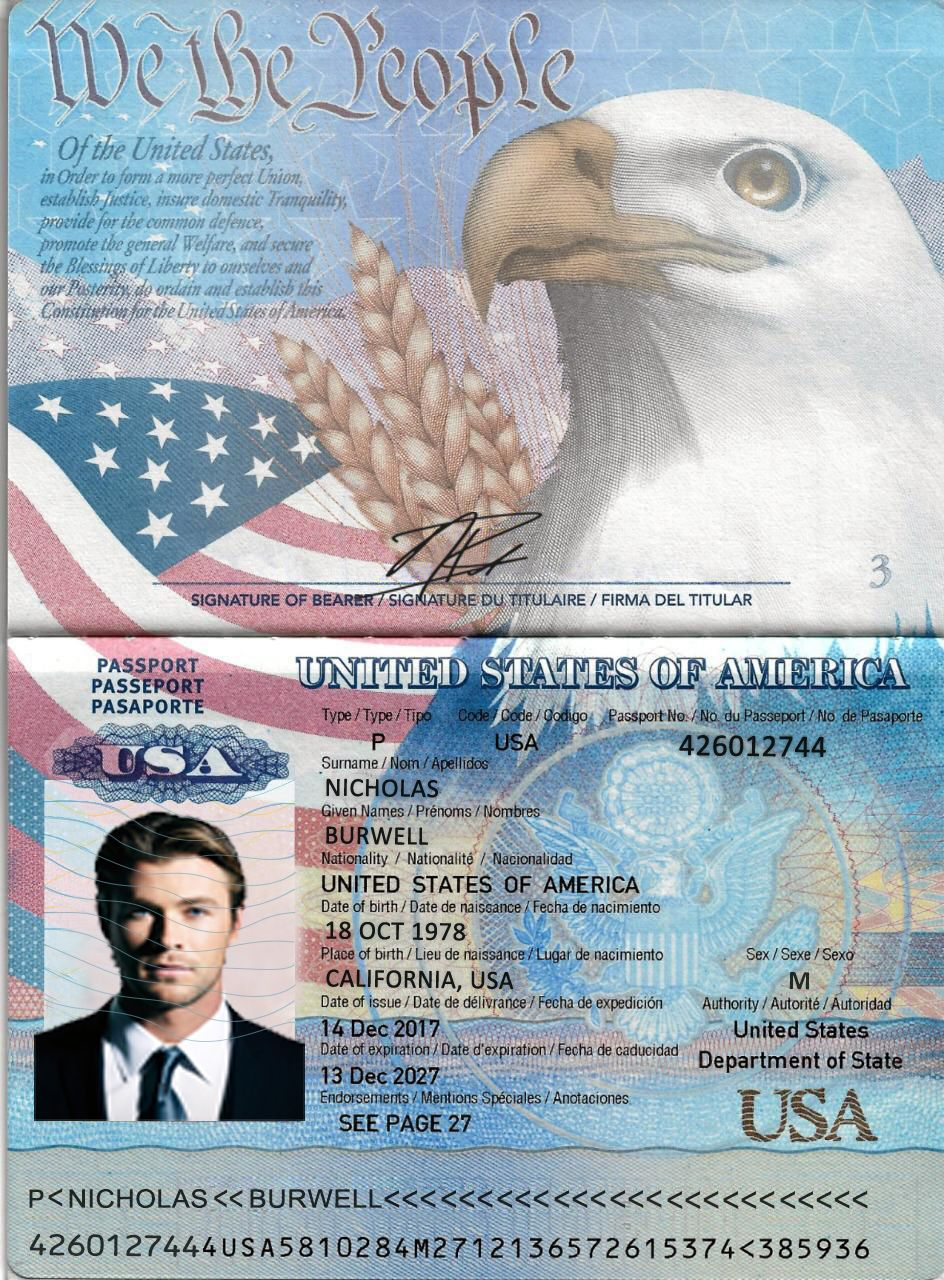

In [15]:
img_path = "images/sample_usa_passport.jpg"
img = encode_image(img_path)
display(Image(img_path, width=300))

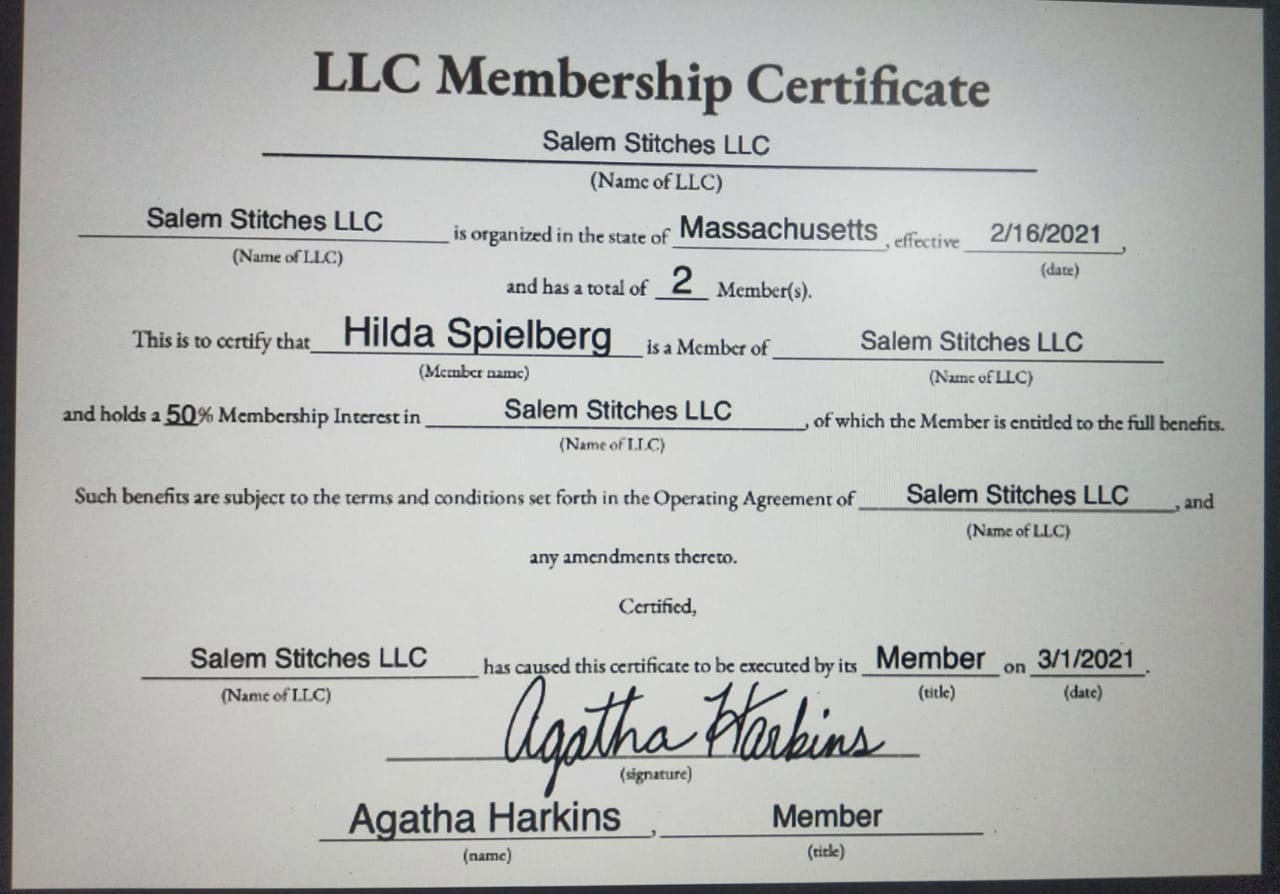

In [16]:
img_path1 = "images/llc_membership.jpeg"
img1 = encode_image(img_path1)
display(Image(img_path1, width=300))

In [17]:
sys_msg = SystemMessage(
    content=[
        {
            "type" : "text",
            "text" : f"""You are an amazing and helpful AI assistant who helps in OCR(Optical Character Recognition) tasks.
                        Your task is to identify these details: {details} in the given image. """
        }
    ]
)

In [18]:
human_msg = HumanMessage(
    content=[
        {
            "type" : "text", 
            # "text": f"""Find these details {details} from the image and return an JSON object with these {details} as keys.\n
            #             Do not include any additional text or explanation. Output must be valid JSON only."""
            # "text": f"Describe the given image and accurately extract any text present in it. Then, find the specified details: {details}."  
            #         "If any details are not found, return them as `NOT FOUND`."
            "text" : "Provide the results as JSON object only."
        },
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{img}"},
        },
    ]
)

In [19]:
ai_msg = AIMessage(
    content=[
        {
            "type" : "text",
            "text" : """\{
                            "First Name": "Nicholas"
                            "Last Name": "Burwell",
                            "Sex": "Male",
                            "Passport Number": "426012744",
                            "Permanent Account Number": "NOT FOUND",
                            "Nationality": "United States of America",
                            "Date of Birth": "18 Oct 1978",
                            "Place of Birth": "California, USA",
                            "Date of Issue": "14 Dec 2017",
                            "Date of Expiration": "13 Dec 2027",
                    \}"""
        }
    ]
)

In [20]:
human_msg1 = HumanMessage(
    content=[
        {
            "type" : "text", 
            # "text": f"""Find these details {details} from the image and return an JSON object with these {details} as keys.\n
            #             Do not include any additional text or explanation. Output must be valid JSON only."""
            # "text": f"Describe the given image and accurately extract any text present in it. Then, find the specified details: {details}."  
            #         "If any details are not found, return them as `NOT FOUND`."
            "text" : "Thats good. Now do the same on this image. Provide the results in a JSON object."
        },
        {
            "type": "image_url",
            "image_url": {"url": f"data:image/jpeg;base64,{img1}"},
        },
    ]
)

In [24]:
from langchain.chat_models import init_chat_model

model = init_chat_model("meta-llama/Llama-Vision-Free", model_provider="together")

In [25]:
messages = [sys_msg, human_msg, ai_msg, human_msg1 ]
response = model.invoke(messages)

In [26]:
Markdown(response.content)

\{
                            "First Name": "Hilda"
                            "Last Name": "Spielberg",
                            "Sex": "Female",
                            "Passport Number": "NOT FOUND",
                            "Permanent Account Number": "NOT FOUND",
                            "Nationality": "United States of America",
                            "Date of Birth": "NOT FOUND",
                            "Place of Birth": "NOT FOUND",
                            "Date of Issue": "NOT FOUND",
                            "Date of Expiration": "NOT FOUND",
                    \}

# PDFs

In [27]:
import pdfplumber

def extract_text_from_pdf(pdf_path):
    """Extracts text from a PDF using pdfplumber."""
    text = ""
    with pdfplumber.open(pdf_path) as pdf:
        for page in pdf.pages:
            text += page.extract_text() + "\n"
    return text.strip()

pdf_path = "images/TTBH97661706.pdf"
text = extract_text_from_pdf(pdf_path)
text

"redBus Ticket Information\nBangalore-Pondicherry on Thursday,\nOctober 31, 2024\nTicket Number: TTBH97661706 | PNR No: SRIOAKCE42837\nHey abhinav hi,\nThank you for booking your bus ticket with redBus. Here are the ticket details for your upcoming trip from Bangalore to Pondicherry on\nThursday, October 31, 2024\nTicket Details\nJourney Date and Time\n31/10/2024, 06:00 AM\nTravels\nSri Vaari Travels\nA/C Sleeper (2+1)\nTicket Price\nRs. 10494.75\n(inclusive of GST)\nBoarding Point\nBangalore\nSilk Board\nNear Girias Showroom\nLandmark: Near Girias Showroom\n9087868699\n9087868699\nDropping Point\nPondicherry\nNear New Bus Stand, Sri Vaari Travels, OPP to Sree Meenakashi in,\nDROPPING DATE & TIME:\n31/10/2024, 12:15 PM\nPassenger Details Seat no\nabhinav L16\n23Yrs, MALE\nvignesh L17\n23Yrs, MALE\nprem U14\n23Yrs, MALE\ndeepesh U17\n22Yrs, MALE\nmaruti U16\n22Yrs, MALE\nCongrats on booking a Primo bus!\nEnjoy top rated features\nPunctual Clean Comfortable\nCancellation policy\nYour cur

In [28]:
response2 = model.invoke(text + "Summarize this text extracted from a pdf")

In [29]:
Markdown(response2.content)

Here's a summary of the text:

**Ticket Details**

* Journey from Bangalore to Pondicherry on October 31, 2024
* Ticket number: TTBH97661706, PNR: SRIOAKCE42837
* Ticket price: Rs. 10,494.75 (inclusive of GST)
* Boarding point: Bangalore, Silk Board, near Girias Showroom
* Dropping point: Pondicherry, near New Bus Stand, Sri Vaari Travels
* Departure time: 06:00 AM, Arrival time: 12:15 PM

**Passenger Details**

* Abhinav, Vignesh, Prem, Deepesh, Maruti (all 23-22 years old, male)

**Cancellation Policy**

* Cancellation charges:
	+ Before October 30, 05:45 AM: Rs. 999.50 (10%)
	+ After October 30, 05:45 AM: Rs. 2,498.75 (25%) to Rs. 9,995.00 (100%)
* Cancellation charges are computed on a per-seat basis.

**Travel Guidelines and Terms**

* Follow travel guidelines for source and destination states
* redBus is an online ticketing platform, not a bus operator
* redBus responsibilities include issuing valid tickets, providing refunds, and customer support
* Departure times are tentative and may change; passengers must furnish e-ticket/m-ticket and valid ID at boarding
* Change of bus: redBus will refund differential amount if notified within 24 hours
* Amenities are subject to change and not guaranteed
* Grievances and claims must be reported within 7 days of travel date
* Cancellation not allowed after bus departure time